# Normalizacion Segundo DataSet

In [160]:
import pandas as pd
import numpy as np
import spacy

In [161]:
idioma_ingles = 'en_core_web_sm'
idioma_espanol = 'es_core_news_sm'

In [162]:
nlp_es = spacy.load('es_core_news_sm')  #Español
nlp_en = spacy.load('en_core_web_sm') #Ingles

In [227]:
stop_words_en = spacy.lang.en.stop_words.STOP_WORDS
stop_words_es = spacy.lang.es.stop_words.STOP_WORDS

In [164]:
def tokenize(text, lang='en'):
    if lang == 'en':
        return [token for token in nlp_en(text)]
    elif lang == 'es':
        return [token for token in nlp_es(text)]
    else:
        raise ValueError("Language not supported")

In [165]:
def remove_stopwords(tokens, lang='en'):
    if lang == 'en':
        return [token for token in tokens if token.text.lower() not in stop_words_en]
    elif lang == 'es':
        return [token for token in tokens if token.text.lower() not in stop_words_es]
    else :
        raise ValueError("Language not supported")

In [166]:
import unicodedata
import re

def normalize_characters2(tokens, lang='en'):
    normalized_tokens = []
    for token in tokens:
        # Convertir el token a minúsculas
        token = token.lower()
        # Eliminar los signos de puntuación
        token = re.sub(r'[^\w\s]', '', token)
        normalized_tokens.append(token)
    return normalized_tokens

In [167]:
import re
import unicodedata

In [185]:
import unicodedata
import re

def normalize_characters(tokens, lang='en'):
    if lang == 'en':
        # Convertir cada token a minúsculas y eliminar caracteres no alfanuméricos excepto espacios
        normalized_tokens = [re.sub(r'[^a-z0-9\s]', '', token.text.lower()) for token in tokens]
        normalized_tokens = [re.sub(r'(https?|ftp)://[^\s/$.?#].[^\s]*', '', token) for token in normalized_tokens] 
        normalized_tokens = [re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', token) for token in normalized_tokens]
    elif lang == 'es':
        # Convertir cada token a Unicode NFC y eliminar caracteres no alfanuméricos excepto letras y espacios
        normalized_tokens = [re.sub(r'[^\w\sáéíóúüñ]', '', unicodedata.normalize('NFC', token.text.casefold())) for token in tokens]
        normalized_tokens = [re.sub(r'(https?|ftp)://[^\s/$.?#].[^\s]*', '', token) for token in normalized_tokens] 
        normalized_tokens = [re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', token) for token in normalized_tokens]
    else:
        raise ValueError("Language not supported")
    normalized_tokens = [token for token in normalized_tokens if token.strip()]
    return normalized_tokens



In [212]:
def preprocess_text(text, lang='en'):
    # Tokenización
    tokens = tokenize(text, lang)
   # tokens = remove_stopwords(tokens, lang)
    tokens = normalize_characters(tokens, lang)

    # Normalización de caracteres
    # Eliminación de stopwords
    return tokens


In [213]:
corpus = pd.read_csv("data.csv")
corpus.head()

,english,spanish
0,Go.,Ve.
1,Go.,Vete.
2,Go.,Vaya.
3,Go.,Váyase.
4,Hi.,Hola.


In [217]:
corpus['english'] = [preprocess_text(x, lang='en') for x in corpus['english']]
corpus['spanish'] = [preprocess_text(x, lang='es') for x in corpus['spanish']]

In [218]:
corpus2 = corpus[:10]
corpus2

,english,spanish
0,[go],[ve]
1,[go],[vete]
2,[go],[vaya]
3,[go],[váyase]
4,[hi],[hola]
5,[run],[corre]
6,[run],[corred]
7,[who],[quién]
8,[fire],[fuego]
9,[fire],[incendio]


# Visualizacion

In [297]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd
from tabulate import tabulate

In [298]:
stopWordTemp = {"Tom", "tom", "m", "s", "ll", "ve", "nt", "s", "mary", "Mary"}

In [311]:
english_tokens = corpus["english"]
token_counter = Counter()
for tokens in english_tokens:
    token_counter.update(token for token in tokens if token not in stop_words_en and token not in stopWordTemp)

top_10_tokens = dict(token_counter.most_common(10))

print(top_10_tokens)


{'want': 3957, 'like': 3558, 'know': 3436, 'time': 2419, 'think': 2023, 'going': 1604, 'come': 1523, 'good': 1502, 'let': 1404, 'need': 1366}


In [300]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(type(stop_words))

<class 'set'>


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


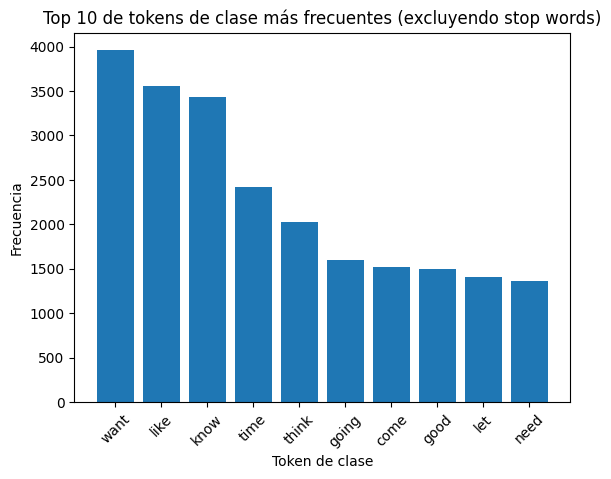

In [301]:
top_10_tokens = dict(token_counter.most_common(10))
plt.bar(top_10_tokens.keys(), top_10_tokens.values())
plt.xlabel('Token de clase')
plt.ylabel('Frecuencia')
plt.title('Top 10 de tokens de clase más frecuentes (excluyendo stop words)')
plt.xticks(rotation=45)
plt.show()

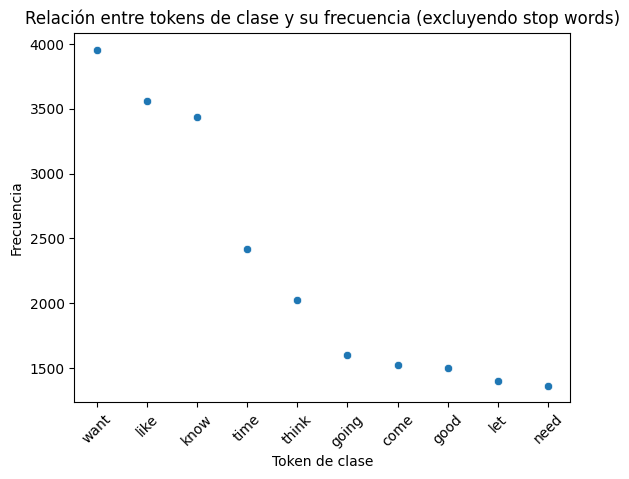

In [312]:
df = pd.DataFrame({'Tokens': list(top_10_tokens.keys()), 'Frecuencia': list(top_10_tokens.values())})
sns.scatterplot(data=df, x='Tokens', y='Frecuencia', marker='o')
plt.xlabel('Token de clase')
plt.ylabel('Frecuencia')
plt.title('Relación entre tokens de clase y su frecuencia (excluyendo stop words)')
plt.xticks(rotation=45)
plt.show()

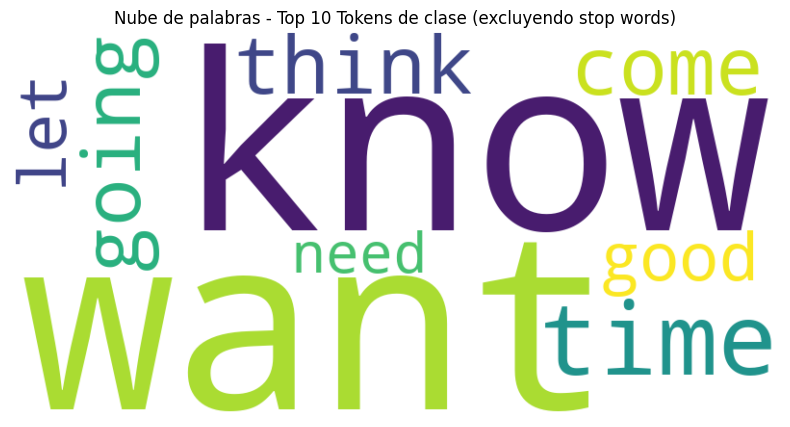

In [303]:
text_top_10 = ' '.join(token for token in top_10_tokens.keys() if token not in stop_words_en)
wordcloud_top_10 = WordCloud(width=800, height=400, background_color='white').generate(text_top_10)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_top_10, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Top 10 Tokens de clase (excluyendo stop words)')
plt.show()

In [304]:
df_top_10 = pd.DataFrame(list(top_10_tokens.items()), columns=['Token de clase', 'Frecuencia'])
print("Tabla de frecuencias de los top 10 tokens de clase más comunes:")
print(tabulate(df_top_10, headers='keys', tablefmt='pretty'))

Tabla de frecuencias de los top 10 tokens de clase más comunes:
+---+----------------+------------+
|   | Token de clase | Frecuencia |
+---+----------------+------------+
| 0 |      want      |    3957    |
| 1 |      like      |    3558    |
| 2 |      know      |    3436    |
| 3 |      time      |    2419    |
| 4 |     think      |    2023    |
| 5 |     going      |    1604    |
| 6 |      come      |    1523    |
| 7 |      good      |    1502    |
| 8 |      let       |    1404    |
| 9 |      need      |    1366    |
+---+----------------+------------+
